# ML Loan-Solutions Elite: Predicting Loan Approval

## Overview
This dataset supports the **ML Loan-Solutions Elite** project, a predictive model for loan approval utilizing advanced machine learning techniques. It integrates structured financial data and unstructured textual input to provide a comprehensive evaluation of applicant eligibility. Designed for educational and research purposes, it serves as an excellent resource for studying financial decision-making.

## Dataset Format
The dataset is available in CSV format and contains both **structured** and **unstructured** data.

### **Structured Data**
This dataset includes essential financial and demographic attributes related to loan applications:

| Feature | Type | Description |
|---------|------|-------------|
| `Income` | `float` | Applicant's total income. |
| `Credit Score` | `integer` | Numerical representation of the applicant’s creditworthiness. |
| `Loan Amount` | `float` | Amount requested by the applicant as a loan. |
| `Debt-to-Income Ratio` | `float` | Ratio of the applicant’s total debt to their income. |
| `Employment Status` | `categorical` | Applicant’s employment condition (e.g., Employed, Unemployed, Self-employed, Retired). |

### **Unstructured Data**
- `Text Description (string)`: A free-text narrative from the applicant describing their financial situation.

## Purpose and Methodology
This dataset is crafted to **enhance loan approval predictions** by leveraging both quantitative financial metrics and qualitative text insights. The **structured data** captures fundamental financial indicators.

## Usage Instructions
The dataset can be utilized for various machine learning and analytics applications:

- Train supervised learning models for **loan approval prediction**.
- Analyze factors influencing **financial decision-making** using structured data models.

## Source and Limitations
- **Synthetic Data:** This dataset is **generated** to simulate realistic loan application scenarios and is fully **anonymized** to protect privacy.
- **Educational Use Only:** This dataset is **not** intended for real-world financial decisions without thorough validation and legal compliance.

## Download Link
Access the dataset here: [ML Loan-Solutions Elite - Kaggle](https://www.kaggle.com/datasets/abhishekmishra08/loan-approval-datasets).

https://github.com/Lucky-Langa/CreditRiskML.git


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    confusion_matrix,
    classification_report,
    recall_score,
    f1_score,
    accuracy_score,
    roc_curve,
    precision_score,
    roc_auc_score

)

import warnings
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [57]:
df = pd.read_csv('loan_data.csv')
df.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


In [59]:
df.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


In [60]:
df.isna().sum()

Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64

In [61]:
# This column is useless, since it's not NLP model
df = df.drop('Text', axis=1)


**_Converting Categorical Data into Numericak Data_**

In [62]:
df['Employment_Status'] = df['Employment_Status'].map({'employed' : 1, 'unemployed' : 0})
df['Approval'] = df['Approval'].map({'Rejected' : 0, 'Approved' : 1})

**_Visualizing the Relationship of Feature_**

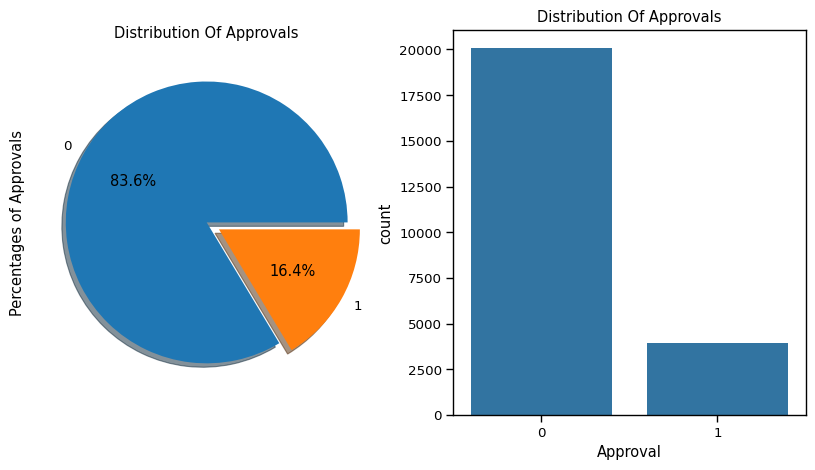

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df['Approval'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Distribution Of Approvals')
ax[0].set_ylabel('Percentages of Approvals')
sns.countplot(data=df, x='Approval',ax=ax[1])
ax[1].set_title('Distribution Of Approvals')
plt.savefig('plots/Distribution_Of_Approvals.png')
plt.show();

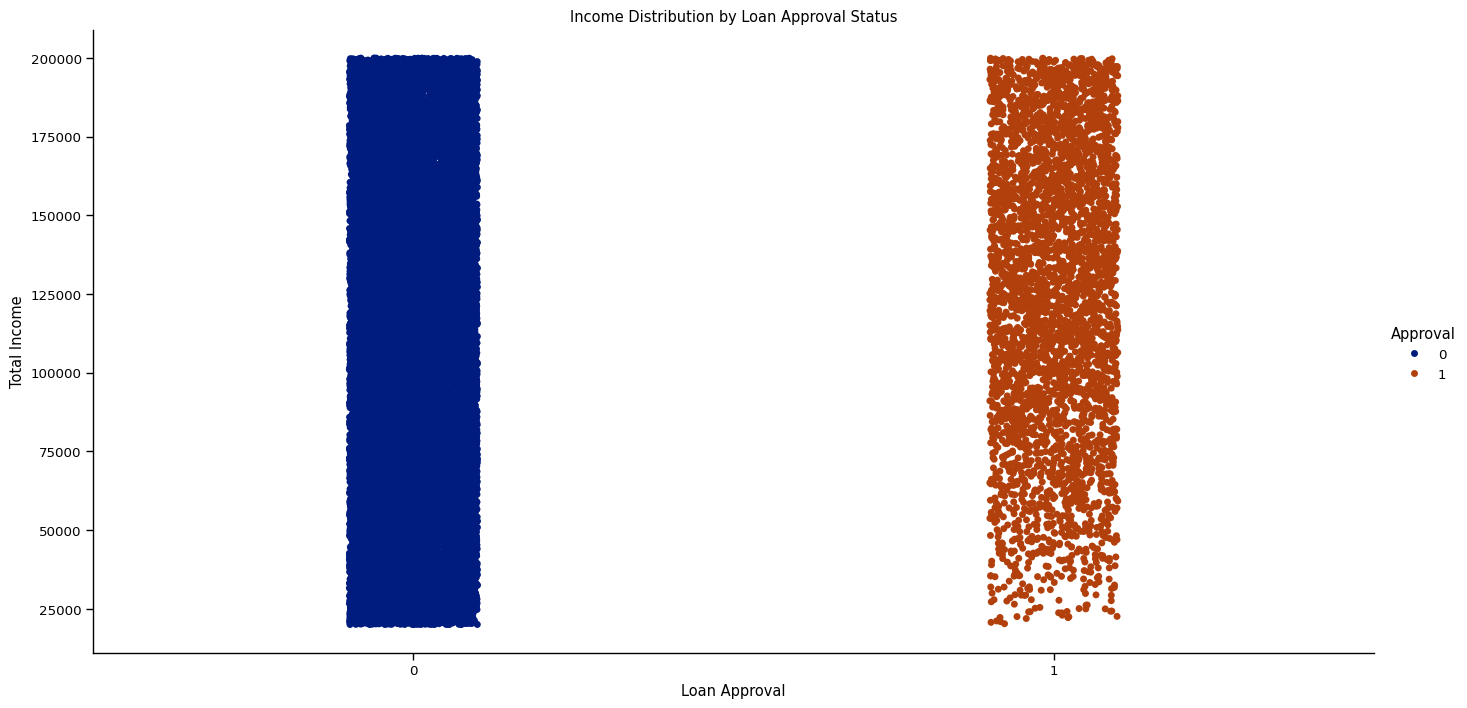

In [108]:
sns.set_context('paper', font_scale=1.1)

# Use catplot instead of factorplot
sns.catplot(y='Income', x='Approval', hue='Approval',data=df, kind='strip', palette='dark', height=7, aspect=2)

plt.ylabel('Total Income')
plt.xlabel('Loan Approval')
plt.title('Income Distribution by Loan Approval Status')
plt.savefig('plots/Income_Distribution_by_Loan_Approval.png')
plt.show()

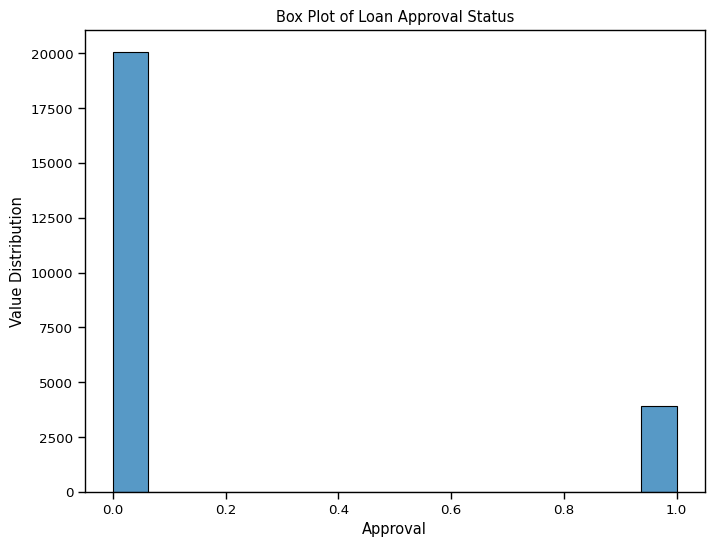

In [109]:
plt.figure(figsize=(8,6))
sns.histplot(data=df['Approval'])
plt.title('Box Plot of Loan Approval Status')
plt.ylabel('Value Distribution')
plt.savefig('plots/Box_Plot_of_Loan_Approval_Status.png')
plt.show()


C:\Users\Langa\AppData\Local\Temp\ipykernel_23520\3857915681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df['Approval'] ,palette=['red', 'blue'])


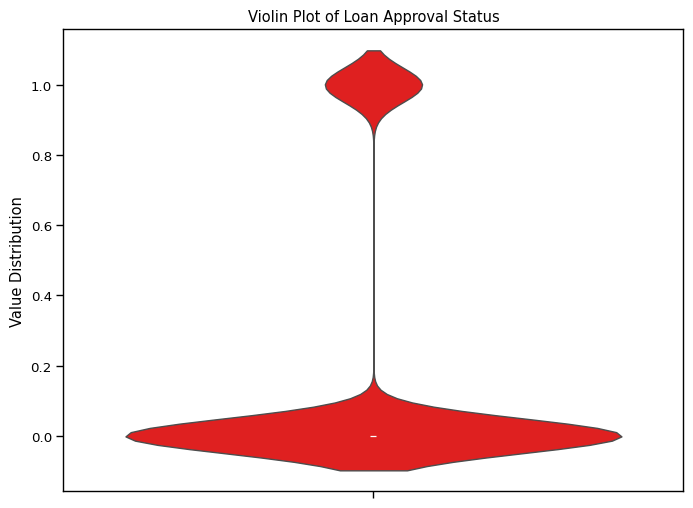

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df['Approval'],hue='Approval' ,palette=['red', 'blue'])
plt.title('Violin Plot of Loan Approval Status')
plt.ylabel('Value Distribution')
plt.savefig('plots/Violin_Plot_of_Loan_Approval_Status.png')
plt.show()


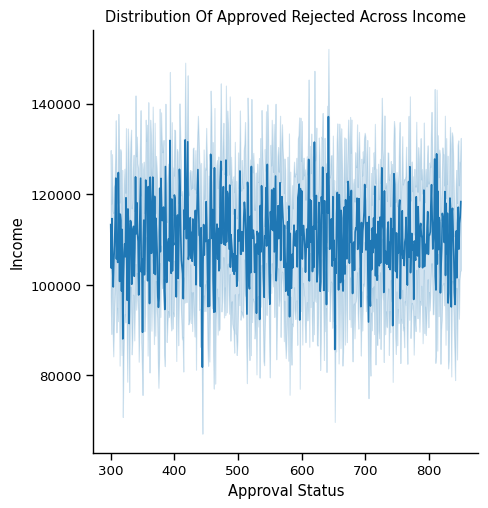

In [110]:
sns.relplot(df, y='Income', x='Credit_Score', kind='line')
plt.title('Distribution Of Approved Rejected Across Income')
plt.ylabel('Income')
plt.xlabel('Approval Status')
plt.savefig('plots/Distribution_Of_Approvals_Across_Income.png')
plt.show();

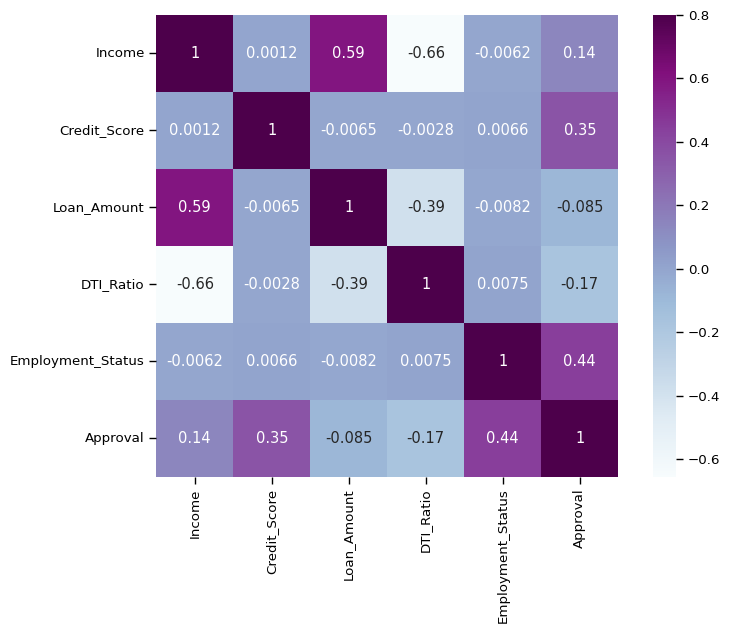

In [111]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df.corr(), vmax = 0.8, square=True,cmap='BuPu', annot=True);
plt.savefig('plots/Correlations_MAP.png');

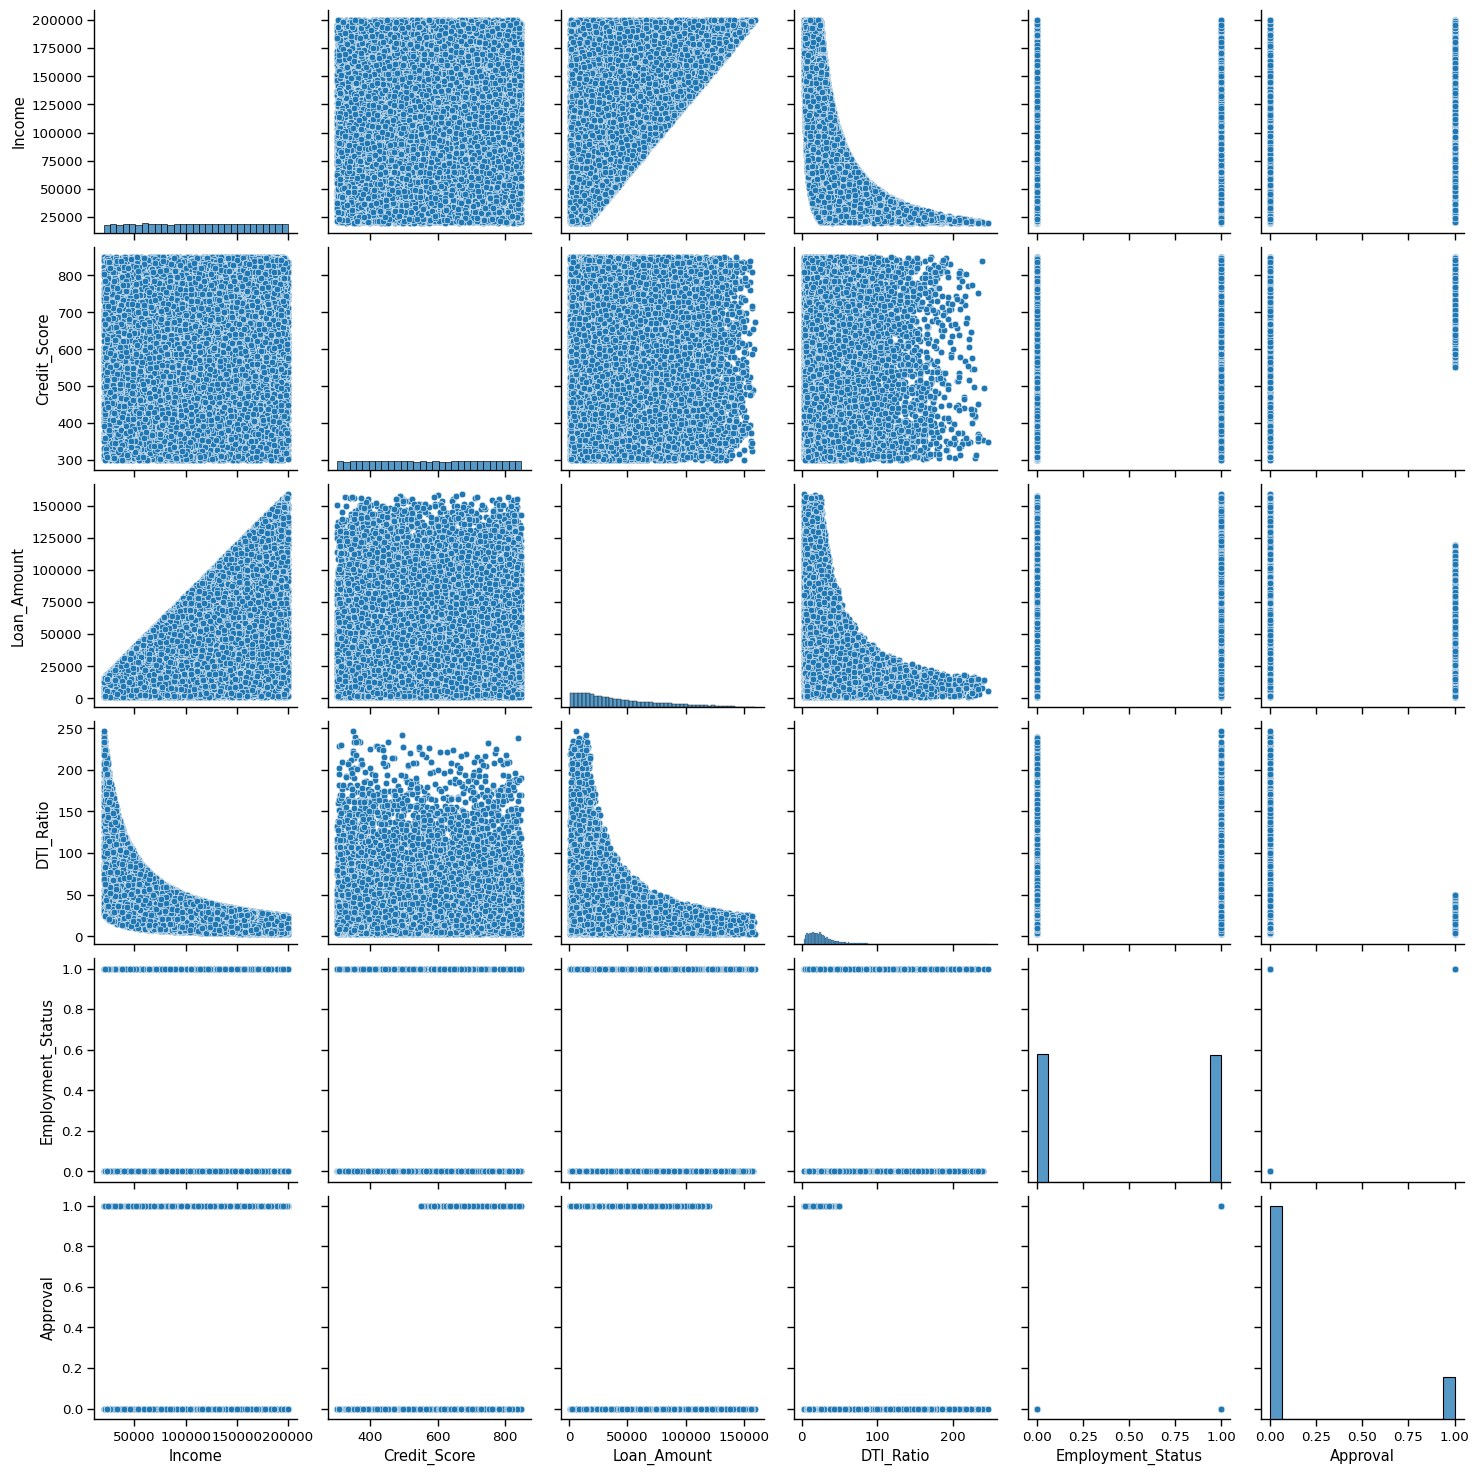

In [112]:
sns.pairplot(df);
plt.savefig('plots/pairplot.png')

In [70]:
X = df.drop('Approval', axis=1)
y = df['Approval']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## **_Models_**

- **_Logistic Regression_**
- **_Naive Bayes_**
- **_KNN_**
- **_DecisionTree_**
- **_RandomForest_**

In [73]:
# Tune KNN
train_scores = []
test_scores = []

# A list for different values of n_neigbhors
n_neighbors = np.arange(1, 21, 1)

knn = KNeighborsClassifier()

for i in n_neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Mximum KNN score on the test data: 84.21%


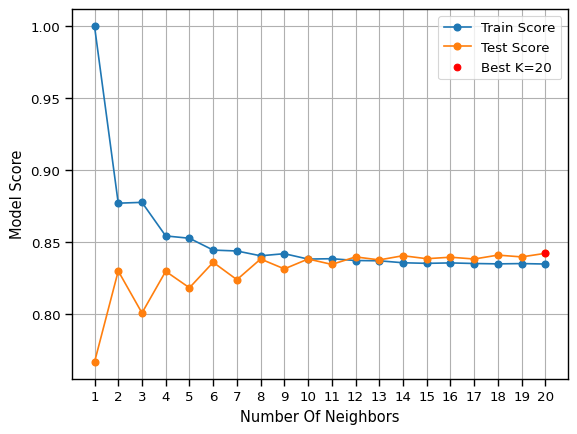

<Figure size 640x480 with 0 Axes>

In [113]:
# Plot the training and test scores
plt.plot(n_neighbors, train_scores, label='Train Score', marker='o')
plt.plot(n_neighbors, test_scores, label='Test Score', marker='o')

# Highlight the best-performing numbr of neighbors
best_k = n_neighbors[np.argmax(test_scores)]
best_score = max(test_scores) * 100
plt.scatter(best_k, best_score/100, color='red', label=f'Best K={best_k}',  zorder=3)

# Formatting
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number Of Neighbors')
plt.ylabel('Model Score')
plt.legend()
plt.grid(True)

print(f'Mximum KNN score on the test data: {best_score:.2f}%')

# Show the plot
plt.show()
plt.savefig('plots/Maximum_KNN_score.png')

In [71]:
# Define the models
models = {
    'lr_model' : LogisticRegression(),
    'Naive Bayes' :GaussianNB(),
    'RandomForest' : RandomForestClassifier(),
    'DecisionTree' : DecisionTreeClassifier()
}
from sklearn.model_selection import cross_val_score

# Fit models and store training scores
train_scores = {}
test_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_scores[name] = model.score(X_train, y_train)  # Training accuracy
    test_scores[name] = model.score(X_test, y_test)  # Test accuracy

# Print train vs test accuracy
print("Train Accuracy:", train_scores)
print("Test Accuracy:", test_scores)

# Perform cross-validation
cv_scores = {name: cross_val_score(model, X_train, y_train, cv=5).mean() for name, model in models.items()}
print("Cross-Validation Scores:", cv_scores)

# Check for overfitting
for name in models.keys():
    print(f"{name}: Train Accuracy = {train_scores[name]:.4f}, Test Accuracy = {test_scores[name]:.4f}, CV Score = {cv_scores[name]:.4f}")


Train Accuracy: {'lr_model': 0.8695833333333334, 'Naive Bayes': 0.8302083333333333, 'RandomForest': 1.0, 'DecisionTree': 1.0}
Test Accuracy: {'lr_model': 0.873125, 'Naive Bayes': 0.8366666666666667, 'RandomForest': 0.9985416666666667, 'DecisionTree': 0.99625}
Cross-Validation Scores: {'lr_model': 0.87015625, 'Naive Bayes': 0.8297916666666666, 'RandomForest': 0.9956770833333334, 'DecisionTree': 0.9941666666666666}
lr_model: Train Accuracy = 0.8696, Test Accuracy = 0.8731, CV Score = 0.8702
Naive Bayes: Train Accuracy = 0.8302, Test Accuracy = 0.8367, CV Score = 0.8298
RandomForest: Train Accuracy = 1.0000, Test Accuracy = 0.9985, CV Score = 0.9957
DecisionTree: Train Accuracy = 1.0000, Test Accuracy = 0.9962, CV Score = 0.9942


**_Looking at the RandomForest and DecisionTree training and testing accuracy, it is evident that the models are overfitting. Overfitting occurs when the models become too complex and start memorizing the training data instead of generalizing to unseen data._**
**_To address this issue, I will tune the hyperparameters using RandomizedSearchCV, which allows efficient searching over a wide range of hyperparameters while reducing computation time. This approach helps improve model generalization and prevents excessive complexity._**

In [77]:
from sklearn.model_selection import (
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV
)

In [78]:
# Model definition


# Parameters for randomForest
rf_grid = {
    'n_estimators': np.arange(200,300, 50),
    'max_depth':[None, 3, 6, 9],
    'min_samples_split': np.arange(2, 30, 2),
    'min_samples_leaf': np.arange(1, 25, 5),
}

# Parameters for DecisionTree
dt_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

In [80]:
rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5, 
    verbose=True,
    random_state=42
)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 6, 9],
                                        'min_samples_leaf': array([ 1,  6, 11, 16, 21]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'n_estimators': array([200, 250])},
                   random_state=42, verbose=True)

In [81]:
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 16,
 'max_depth': None}

In [82]:
rs_rf.best_score_

0.9926041666666666

In [83]:
rs_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=dt_grid,
    cv=5, 
    verbose=True,
    random_state=42
)

rs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=42, verbose=True)

In [84]:
rs_dt.best_params_

{'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 12,
 'criterion': 'gini'}

In [85]:
rs_dt.best_score_

0.9946354166666665

**_Evaluating Models Beyond Accuracy_**

In [86]:
rs_rf_pred = rs_rf.predict(X_test)
rs_rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
y_test.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

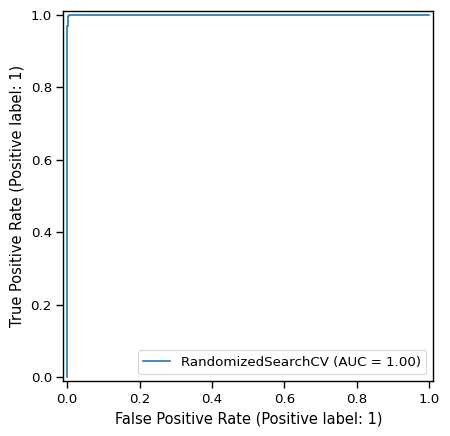

In [114]:
RocCurveDisplay.from_estimator(rs_rf,X_test, y_test)
plt.savefig('plots/gs-rf_RocCurve.png')

In [89]:
conf_mat = confusion_matrix(y_test, rs_rf_pred)
print(conf_mat)

[[4034   13]
 [   7  746]]


In [90]:
def plot_confusion_matrix(y_test, gs_rf):
    '''
    Plots a nice looking confusion matrix using seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(5,5))
    ac = sns.heatmap(confusion_matrix(y_test,rs_rf_pred),
    annot=True,
    cbar=False)

    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

    bottom, top = ax.get_ylim()
    ax.set_ylib = (bottom + 0.5, top - 0.5)


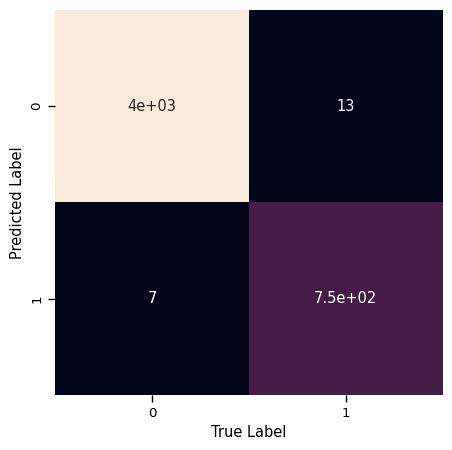

In [115]:
plot_confusion_matrix(y_test, rs_rf_pred)
plt.savefig('plots/confusion_matrix.png')

In [92]:
# Getting a classification report
print(classification_report(y_test,rs_rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4047
           1       0.98      0.99      0.99       753

    accuracy                           1.00      4800
   macro avg       0.99      0.99      0.99      4800
weighted avg       1.00      1.00      1.00      4800



In [93]:
rs_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 16,
 'max_depth': None}

In [94]:
accuracy = accuracy_score(y_test, rs_rf_pred)
precision=precision_score(y_test, rs_rf_pred)
recall = recall_score(y_test,rs_rf_pred)
f1 =f1_score(y_test,rs_rf_pred)

In [95]:
accuracy, precision, recall, f1

(0.9958333333333333,
 0.9828722002635046,
 0.9907038512616202,
 0.9867724867724867)

In [96]:
final_evaluation = pd.DataFrame(
    [accuracy, precision, recall, f1],
    index=['accuracy', 'precision','recall', 'f1'],
    columns=['score']
)

final_evaluation

,score
accuracy,0.995833
precision,0.982872
recall,0.990704
f1,0.986772


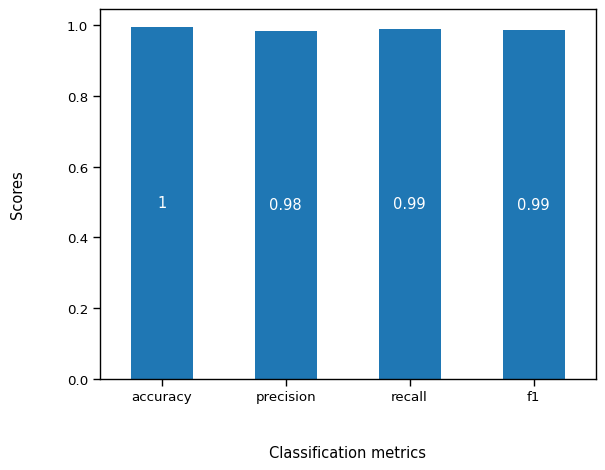

<Figure size 640x480 with 0 Axes>

In [116]:
bars = final_evaluation.plot.bar(
    legend=False,
    xlabel='Classification metrics',
    ylabel='scores',
    rot=0
)

# Customize
plt.bar_label(
    bars.containers[0],
    fmt='%1.2g',
    label_type='center',
    color='white'
)

plt.xlabel('Classification metrics', labelpad=30)
plt.ylabel('Scores', labelpad=30)
plt.show()
plt.savefig('plots/ClassificationMetrics.png')

In [99]:
best_rs_rf = rs_rf.best_estimator_

In [101]:
best_rs_rf.feature_importances_

array([0.08106577, 0.33949289, 0.15738696, 0.10939331, 0.31266106])

In [102]:
X_train.columns

Index(['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio',
       'Employment_Status'],
      dtype='object')

In [104]:
imp_features = pd.DataFrame(
    data=best_rs_rf.feature_importances_.T, index=X_train.columns, columns=['Feature Importance']
)
imp_features

,Feature Importance
Income,0.081066
Credit_Score,0.339493
Loan_Amount,0.157387
DTI_Ratio,0.109393
Employment_Status,0.312661


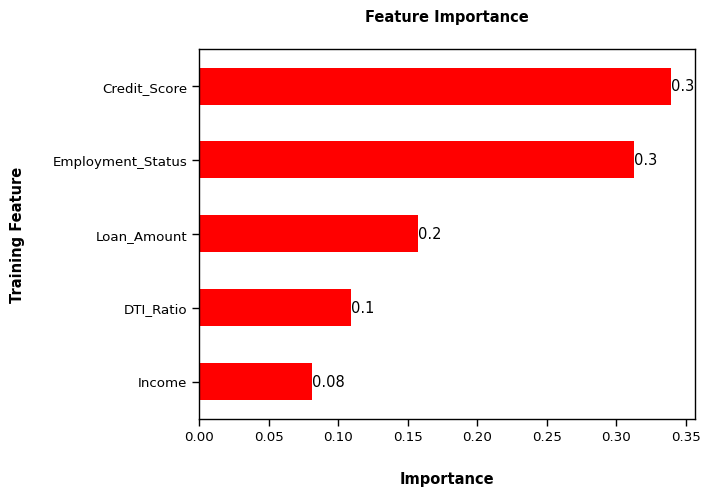

In [117]:
bar = imp_features.sort_values(by='Feature Importance').plot.barh(
    legend=False,
    color='red'
)

# Customize
bar.set_xlabel(xlabel='Importance', labelpad=20,weight='bold')
bar.set_ylabel(ylabel='Training Feature', labelpad=20, weight='bold')
bar.set_title('Feature Importance', pad=20, weight='heavy')
bar.bar_label(bar.containers[0], fmt='%1.1g')
plt.savefig('plots/feature_importance.png')
plt.show(bar)